# ETF simple analysis

Import and update ETF returns to today

In [1]:
import yahoo_import as yahoo

symbols = [
    #SPDR MSCI Europe Small Cap Val Weighted
    "ZPRX.DE",
    #iShares S&P 500 EUR Hedged UCITS ETF
    "IUES.AS" 
]

yahoo.download_portfolio_data(symbols)

In [3]:
import yahoo_import as yahoo

portfolio_returns = yahoo.read_portfolio_data(["ZPRX.DE", "IUES.AS"])
portfolio_returns.head()

,ZPRX.DE,IUES.AS
Date,,
2015-02-18,NaN,0.000614
2015-02-19,-0.000033,0.002074
2015-02-20,0.005559,-0.002344
2015-02-23,0.006221,0.006308
2015-02-24,0.003254,0.003155


<AxesSubplot:xlabel='Date'>

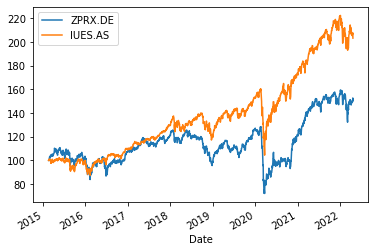

In [4]:
import edhec_risk_kit as erk

wealth = erk.compound_returns(portfolio_returns, 100)
wealth.plot()

In [5]:
portfolio_returns_monthly = erk.resample_returns(portfolio_returns)

<AxesSubplot:ylabel='Frequency'>

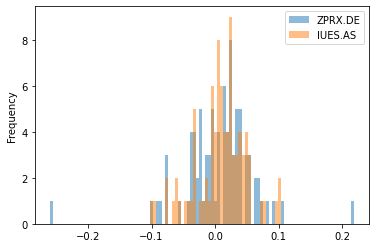

In [6]:
portfolio_returns_monthly.plot.hist(bins=100, alpha=0.5)

In [7]:
erk.summary_stats(portfolio_returns_monthly)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
ZPRX.DE,0.058037,0.191233,0.142433,-0.768247,9.868505,0.122090,0.087774,-0.347849
IUES.AS,0.102862,0.138267,0.512737,-0.415025,3.589506,0.082542,0.060372,-0.186921
